<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/1_LM_Simple_Linear_to_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear to Polynomial Regression

## Data Prep

In [ ]:
import pandas as pd
import numpy as np
!pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.2 MB/s eta 0:00:00


In [ ]:
# import data from mySQL database  using the following info host: kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com, id cob, password 1212, db='data', port 3306

import pymysql.cursors

# Connect to the database
connection = pymysql.connect(host='kaylee-db.cbgcswckszgl.us-east-1.rds.amazonaws.com',
                             user='',
                             password='',
                             db='data',
                             cursorclass=pymysql.cursors.DictCursor)

try:
    # Create a cursor object
    with connection.cursor() as cursor:
        # Execute the SQL query to fetch all data from the 'data' table
        cursor.execute("SELECT * FROM data.fish")

        # Fetch all the results
        results = cursor.fetchall()

        # Convert the results to a Pandas DataFrame
        fish_df = pd.DataFrame(results)

finally:
    # Close the connection
    connection.close()

# Print the DataFrame
print(fish_df)


In [ ]:
fish_df.head(2)

,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0


In [ ]:
# Convert the DataFrame to a NumPy array:
# Select only length and weight columns for conducting a simple linear regression

fish = fish_df[["length","weight"]].to_numpy()
print(fish)

In [ ]:
#train-test split: Use the weight column as target,y  length as X (X should be reshaped into 2D arrays)
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(fish[:,0].reshape(-1,1), fish[:,1], random_state=0)

In [ ]:
train_X.shape

(42, 1)

In [ ]:
test_X.shape

(14, 1)

In [ ]:
train_y.shape

(42,)

## Fit model - simple linear regression

In [ ]:
from sklearn import linear_model
m1 = linear_model.LinearRegression()
m1.fit(train_X, train_y)

LinearRegression()

In [ ]:
# beta coefficient for weight
m1.coef_

array([37.76648694])

In [ ]:
# intercept
m1.intercept_

-659.8027258214022

###Evalute Model Performance: m1

In [ ]:
# Evaluate R^2 of the the model on the train vs. test set
print("Train set score:",  m1.score(train_X, train_y))
print("Test set score:", m1.score(test_X, test_y))

Train set score: 0.922603499955257
Test set score: 0.8803680435261592


In [ ]:
m1.predict([[60,]])

array([1632.01005286])

In [ ]:
m1.predict([[15,],
           [50,]])

array([-123.7614705 , 1241.83860323])

### Plot Test set results: Simple Linear


Text(0, 0.5, 'weight')

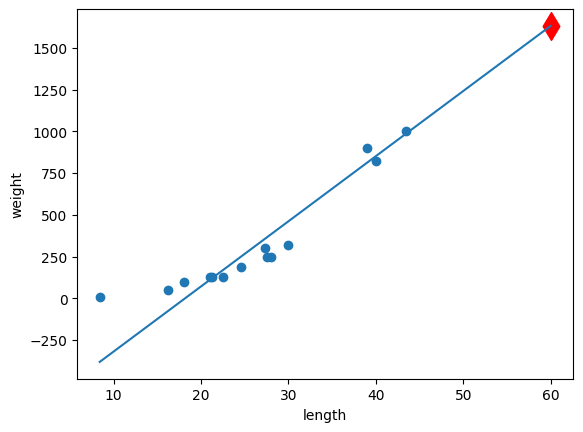

In [ ]:
# Plot the regression line on test set (length vs. weight predicted)
plt.scatter(test_X[:,0], test_y)
plt.plot([8.4,60],m1.predict([[8.4,],[60,]]))
plt.scatter(60,m1.predict([[60,]]), color='r', marker="d", s=200)

plt.xlabel('length')
plt.ylabel('weight')

## Preprocessing - Featur engineering (creating polinomial terms)

In [ ]:
train_poly = np.column_stack([train_X **2, train_X])
test_poly=np.column_stack([test_X**2, test_X])

##Fit model - polynomial regression

In [ ]:
m2 = linear_model.LinearRegression()
m2.fit(train_poly, train_y)


LinearRegression()

In [ ]:
print(m2.coef_)
print(m2.intercept_)

[  0.99334411 -20.28904844]
100.6925153656606


### Evaluate Model Performance: m2

In [ ]:
# m2, which added quadratic term of length, turns out to exhibit a superior R^2
print(m2.score(train_poly, train_y))
print(m2.score(test_poly, test_y))

0.9734828103169649
0.9624346725637875


### Plot Test set results : polynomial

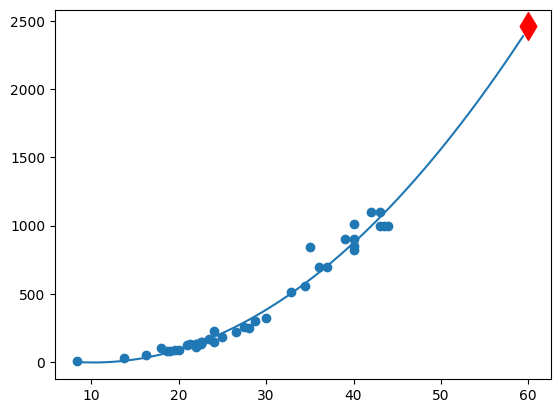

In [ ]:
# Plot the regression line on test set (length vs. weight predicted)
plt.scatter(train_X, train_y)
point=np.arange(8.4, 60)
plt.plot(point,0.99*point**2 + -20.29*point+100.7 )
plt.scatter(60,m2.predict([[60**2,60]]), color='r', marker="d", s=200)

In [ ]:
# The weight for a fish with the length of 60 inch is now predicted to be 2459 lbs.
m2.predict([[60**2, 60]])

array([2459.38839299])



> Check the R^2 for both train and test set



